<a href="https://colab.research.google.com/github/ma7moud09/ma7moud09/blob/main/Chips%20Sales%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import datetime
from matplotlib.dates import DateFormatter
import re


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import and read data


In [ ]:
path_behav = '/content/drive/MyDrive/QVI_purchase_behaviour.csv'
path_trans = '/content/drive/MyDrive/QVI_transaction_data.xlsx'

df_behav = pd.read_csv(path_behav, header= None)
df_trans = pd.read_excel(path_trans, header = None)


In [ ]:
header_behav = ['LYLTY_CARD_NBR','LIFESTAGE','PREMIUM_CUSTOMER']
df_behav.drop(df_behav[[0]],axis= 0, inplace = True )
df_behav.columns= header_behav
df_behav.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
1,1000,YOUNG SINGLES/COUPLES,Premium
2,1002,YOUNG SINGLES/COUPLES,Mainstream
3,1003,YOUNG FAMILIES,Budget
4,1004,OLDER SINGLES/COUPLES,Mainstream
5,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
df_behav['LYLTY_CARD_NBR'].head()

1    1000
2    1002
3    1003
4    1004
5    1005
Name: LYLTY_CARD_NBR, dtype: object

# Transaction data explor and anlysis

In [ ]:
print(df_trans.shape)
df_trans.head()

(264837, 8)


,0,1,2,3,4,5,6,7
0,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
1,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6
2,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
3,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
4,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15


In [ ]:
header_trans = ['DATE','STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR',
                'PROD_NAME', 'PROD_QTY','TOT_SALES']

df_trans.drop(df_trans[[0]], axis = 0, inplace = True)
df_trans.columns = header_trans
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
1,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6
2,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
3,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
4,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15
5,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
df_trans.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836,264836,264836,264836,264836,264836,264836,264836.0
unique,364,272,72637,263127,114,114,6,112.0
top,43458,226,172032,1162,102,Kettle Mozzarella Basil & Pesto 175g,2,9.2
freq,939,2022,18,3,3304,3304,236039,22821.0


In [ ]:
df_trans.dtypes

DATE              object
STORE_NBR         object
LYLTY_CARD_NBR    object
TXN_ID            object
PROD_NBR          object
PROD_NAME         object
PROD_QTY          object
TOT_SALES         object
dtype: object

In [ ]:
df_trans['DATE'] = df_trans['DATE'].astype(float)
df_trans['STORE_NBR'] = df_trans['STORE_NBR'].astype(float)
df_trans['LYLTY_CARD_NBR'] = df_trans['LYLTY_CARD_NBR'].astype(float)
df_trans['TXN_ID'] = df_trans['TXN_ID'].astype(float)
df_trans['PROD_NBR'] = df_trans['PROD_NBR'].astype(float)
df_trans['PROD_QTY'] = df_trans['PROD_QTY'].astype(float)
df_trans['TOT_SALES'] = df_trans['TOT_SALES'].astype(float)

In [ ]:
df_trans.dtypes

DATE              float64
STORE_NBR         float64
LYLTY_CARD_NBR    float64
TXN_ID            float64
PROD_NBR          float64
PROD_NAME          object
PROD_QTY          float64
TOT_SALES         float64
dtype: object

In [ ]:
df_trans.isnull().sum().to_frame()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


In [ ]:
df_trans['TXN_ID'].nunique()

263127

In [ ]:
df_trans[df_trans.duplicated(['TXN_ID'])].head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
43,43605.0,55.0,55073.0,48887.0,113.0,Twisties Chicken270g,1.0,4.6
378,43475.0,7.0,7364.0,7739.0,20.0,Doritos Cheese Supreme 330g,2.0,11.4
420,43391.0,12.0,12301.0,10982.0,93.0,Doritos Corn Chip Southern Chicken 150g,2.0,7.8
477,43351.0,16.0,16427.0,14546.0,81.0,Pringles Original Crisps 134g,1.0,3.7
512,43315.0,19.0,19272.0,16683.0,31.0,Infzns Crn Crnchers Tangy Gcamole 110g,2.0,7.6


In [ ]:
df_trans.loc[df_trans['TXN_ID']==7739, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
377,43475.0,7.0,7364.0,7739.0,50.0,Tostitos Lightly Salted 175g,2.0,8.8
378,43475.0,7.0,7364.0,7739.0,20.0,Doritos Cheese Supreme 330g,2.0,11.4


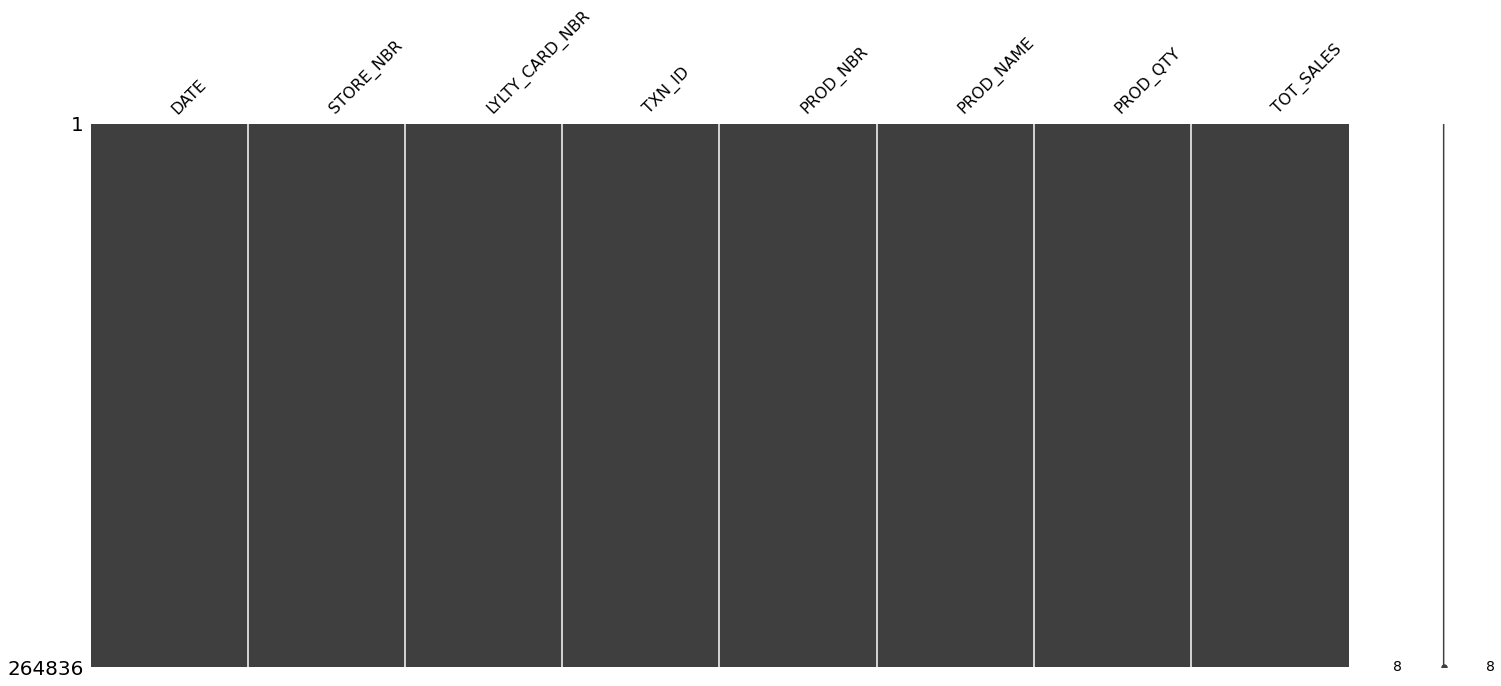

In [ ]:
missingno.matrix(df_trans)

# Date is not in the right format
#
 Apply function to Date feature in transactionData dataset


In [ ]:

def xlseriesdate_to_datetime(xlserialdate):
    excel_anchor = datetime.datetime(1900, 1, 1)
    if(xlserialdate < 60):
        delta_in_days = datetime.timedelta(days = (xlserialdate - 1))
    else:
        delta_in_days = datetime.timedelta(days = (xlserialdate - 2))
    converted_date = excel_anchor + delta_in_days
    return converted_date


In [ ]:

df_trans['DATE'] = df_trans['DATE'].apply(xlseriesdate_to_datetime)

In [ ]:
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
1,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0
2,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3
3,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9
4,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0
5,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8


In [ ]:
trans_date= df_trans.sort_values(['TOT_SALES'], ascending=False).groupby('DATE').head(10)
top10_days = trans_date.head(10)
print(top10_days.shape)
top10_days.head()

(10, 8)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69763,2018-08-19,226.0,226000.0,226201.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0
69764,2019-05-20,226.0,226000.0,226210.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0
69497,2018-08-15,49.0,49303.0,45789.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5
55559,2019-05-14,190.0,190113.0,190914.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5
171816,2018-08-17,24.0,24095.0,20797.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,5.0,29.5


In [ ]:
# Extract weights out of 'PROD_NAME'

df_trans['PROD_SIZE'] = df_trans['PROD_NAME'].str.extract('(\d+)')
df_trans['PROD_SIZE'] = df_trans['PROD_SIZE'].astype(float)
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
1,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175.0
2,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,175.0
3,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,170.0
4,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly S/Cream&Onion 175g,5.0,15.0,175.0
5,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3.0,13.8,150.0


In [ ]:
# Create text cleaning function for PROD_NAME feature

def clean_text (text):
    text = re.sub('[&/]','',text)
    text = re.sub('d\w','',text)
    return text

In [ ]:
df_trans['PROD_NAME'] = df_trans['PROD_NAME'].apply(clean_text)
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
1,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175.0
2,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,175.0
3,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,170.0
4,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly SCreamOnion 175g,5.0,15.0,175.0
5,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHnyJlpno Chili 150g,3.0,13.8,150.0



# anlysis of Value counts of PROD_QTY

In [ ]:
df_trans['PROD_QTY'].value_counts().to_frame()

,PROD_QTY
2.0,236039
1.0,27518
5.0,450
3.0,430
4.0,397
200.0,2


In [ ]:
df_trans.loc[df_trans['PROD_QTY'] == 200, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
69763,2018-08-19,226.0,226000.0,226201.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,380.0
69764,2019-05-20,226.0,226000.0,226210.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,380.0


In [ ]:
df_trans.loc[df_trans['LYLTY_CARD_NBR'] == 226000, :]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
69763,2018-08-19,226.0,226000.0,226201.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,380.0
69764,2019-05-20,226.0,226000.0,226210.0,4.0,Dorito Corn Chp Supreme 380g,200.0,650.0,380.0


In [ ]:
df_trans.drop(df_trans.index[df_trans['PROD_QTY'] == 20], inplace = True)
df_trans.drop(df_trans.index[df_trans['LYLTY_CARD_NBR'] == 226000], inplace = True)

In [ ]:
df_trans['DATE'].nunique()

364

# sales_per_day

In [ ]:
pd.date_range(start = '2018-07-01', end = '2019-06-30').difference(df_trans['DATE'])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [ ]:
sales = df_trans.groupby('DATE')['TOT_SALES'].sum().to_frame()
print(sales.shape)
sales.head()

(364, 1)


,TOT_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [ ]:
day = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end= '2019-06-30'))
day['TOT_SALES'] = 0
day.head()

,TOT_SALES
2018-07-01,0
2018-07-02,0
2018-07-03,0
2018-07-04,0
2018-07-05,0


In [ ]:
sales_per_day = sales + day
sales_per_day.fillna(0, inplace=True)
sales_per_day.head()

,TOT_SALES
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [ ]:
sales_per_day.index.name = 'Date'
sales_per_day.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
sales_per_day.head()


,Total Sales
Date,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


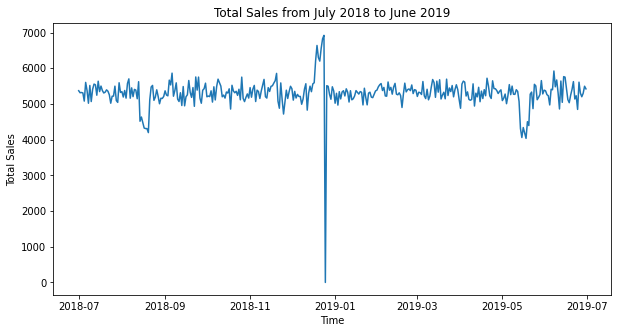

In [ ]:
timeline = sales_per_day.index
graph = sales_per_day['Total Sales']

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(timeline, graph)

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.title('Total Sales from July 2018 to June 2019')
plt.xlabel('Time')
plt.ylabel('Total Sales')

plt.show()

In [ ]:
sales_per_day[sales_per_day['Total Sales']==0].head()

,Total Sales
Date,
2018-12-25,0.0


In [ ]:
sales_per_decem = sales_per_day[(sales_per_day.index <'2019-01-01') & (sales_per_day.index > '2018-11-30')]
sales_per_day.head()

,Total Sales
Date,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


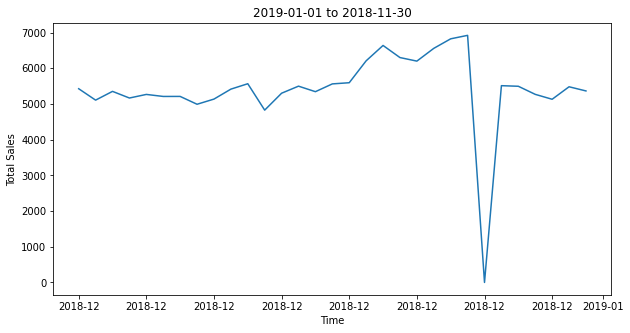

In [ ]:
timedecem = sales_per_decem.index
graphdcem = sales_per_decem['Total Sales']

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(timedecem, graphdcem )

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.title('2019-01-01 to 2018-11-30')
plt.xlabel('Time')
plt.ylabel('Total Sales')

plt.show()

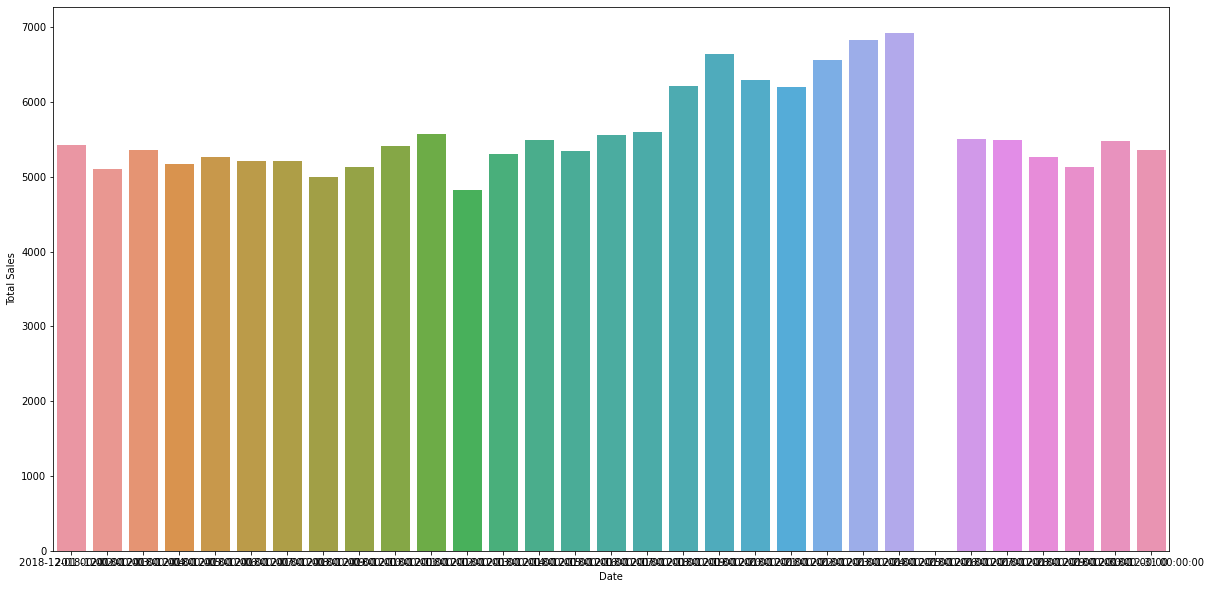

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x =timedecem , y = graphdcem)

In [ ]:
sales_per_decem.reset_index(drop=True, inplace=True)
sales_per_decem.head()

,Total Sales
0,5427.6
1,5108.2
2,5353.3
3,5167.3
4,5268.0


In [ ]:
sales_per_decem['Date'] = sales_per_decem.index +1
sales_per_decem.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Total Sales,Date
0,5427.6,1
1,5108.2,2
2,5353.3,3
3,5167.3,4
4,5268.0,5


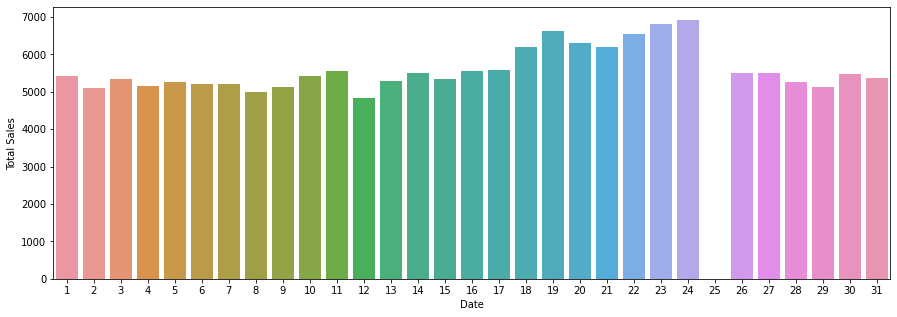

In [ ]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Date', y ='Total Sales', data = sales_per_decem)

In [ ]:
df_trans.groupby('PROD_SIZE')['TOT_SALES'].sum().to_frame()

,TOT_SALES
PROD_SIZE,
70.0,6852.0
90.0,9676.4
110.0,162765.4
125.0,5733.0
134.0,177655.5
135.0,26090.4
150.0,304288.5
160.0,10647.6
165.0,101360.6


(array([  4515.,  23841.,  74460., 106133.,  12309.,   3169.,   6285.,
         15166.,  12540.,   6416.]),
 array([ 70., 101., 132., 163., 194., 225., 256., 287., 318., 349., 380.]),
 <a list of 10 Patch objects>)

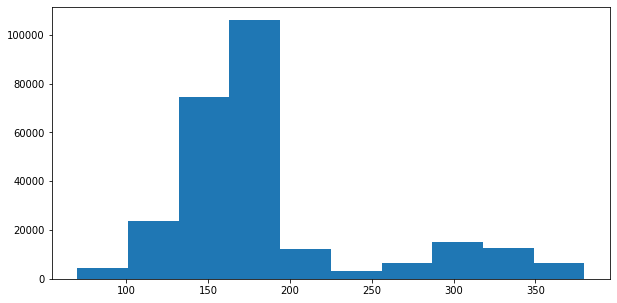

In [ ]:
plt.figure(figsize = (10,5))
plt.hist(df_trans['PROD_SIZE'])

In [ ]:
part = df_trans['PROD_NAME'].str.partition()
df_trans['BRAND'] = part[0]
df_trans.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND
1,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175.0,Natural
2,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,175.0,CCs
3,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,170.0,Smiths
4,2018-08-17,2.0,2373.0,974.0,69.0,Smiths Chip Thinly SCreamOnion 175g,5.0,15.0,175.0,Smiths
5,2018-08-18,2.0,2426.0,1038.0,108.0,Kettle Tortilla ChpsHnyJlpno Chili 150g,3.0,13.8,150.0,Kettle


In [ ]:
df_trans['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [ ]:
df_trans['BRAND'].replace('Ncc', 'Natural', inplace = True)
df_trans['BRAND'].replace('Ccs', 'CCS', inplace = True)
df_trans['BRAND'].replace('Smith', 'Smiths', inplace = True)
df_trans['BRAND'].replace(['Grain', 'Grnwves'], 'Grainwaves', inplace = True)
df_trans['BRAND'].replace('Dorito', 'Doritos', inplace = True)
df_trans['BRAND'].replace('Ww', 'Woolworths', inplace = True)
df_trans['BRAND'].replace('Infzns', 'Infuzions', inplace = True)
df_trans['BRAND'].replace(['Red', 'Rrd'], 'Red Rock Deli', inplace = True)
df_trans['BRAND'].replace('Snbts', 'Sunbites', inplace = True)

df_trans['BRAND'].unique()


array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grainwaves',
       'Doritos', 'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels',
       'Infuzions', 'Red Rock Deli', 'Pringles', 'GrnWves', 'Tyrrells',
       'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Sunbites'], dtype=object)

## Which `brand had the most sales`

In [ ]:

df_trans.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending = False)


BRAND
Kettle           390239.8
Doritos          240590.9
Smiths           224660.2
Pringles         177655.5
Infuzions         99047.6
Old               90785.1
Thins             88852.5
Twisties          81522.1
Tostitos          79789.6
Cobs              70569.8
RRD               64954.5
Tyrrells          51647.4
Grainwaves        43048.8
Cheezels          40029.9
WW                35889.5
Natural           34272.0
Red Rock Deli     30091.5
CCs               18078.9
Cheetos           16884.5
Woolworths        13454.1
Sunbites           9676.4
GrnWves            8568.4
NCC                8046.0
French             7929.0
Burger             6831.0
Name: TOT_SALES, dtype: float64

In [ ]:
brand_most_sales = pd.DataFrame(df_trans.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending = False))
brand_most_sales.reset_index(drop=True, inplace=True)
print(brand_most_sales.shape)
brand_most_sales.head()

(25, 1)


,TOT_SALES
0,390239.8
1,240590.9
2,224660.2
3,177655.5
4,99047.6


In [ ]:
brand_most_sales['BRAND'] =['Kettle','Doritos','Smiths','Pringles','Infuzions',
                            'Old','Thins','Twisties','Tostitos','Cobs','RRD',
                            'Tyrrells','Grainwaves','Cheezels','WW','Natural',
                            'Red Rock Deli','CCs','Cheetos','Woolworths',
                            'Sunbites','GrnWves','NNC','French','Burger']


brand_most_sales.head()

,TOT_SALES,BRAND
0,390239.8,Kettle
1,240590.9,Doritos
2,224660.2,Smiths
3,177655.5,Pringles
4,99047.6,Infuzions


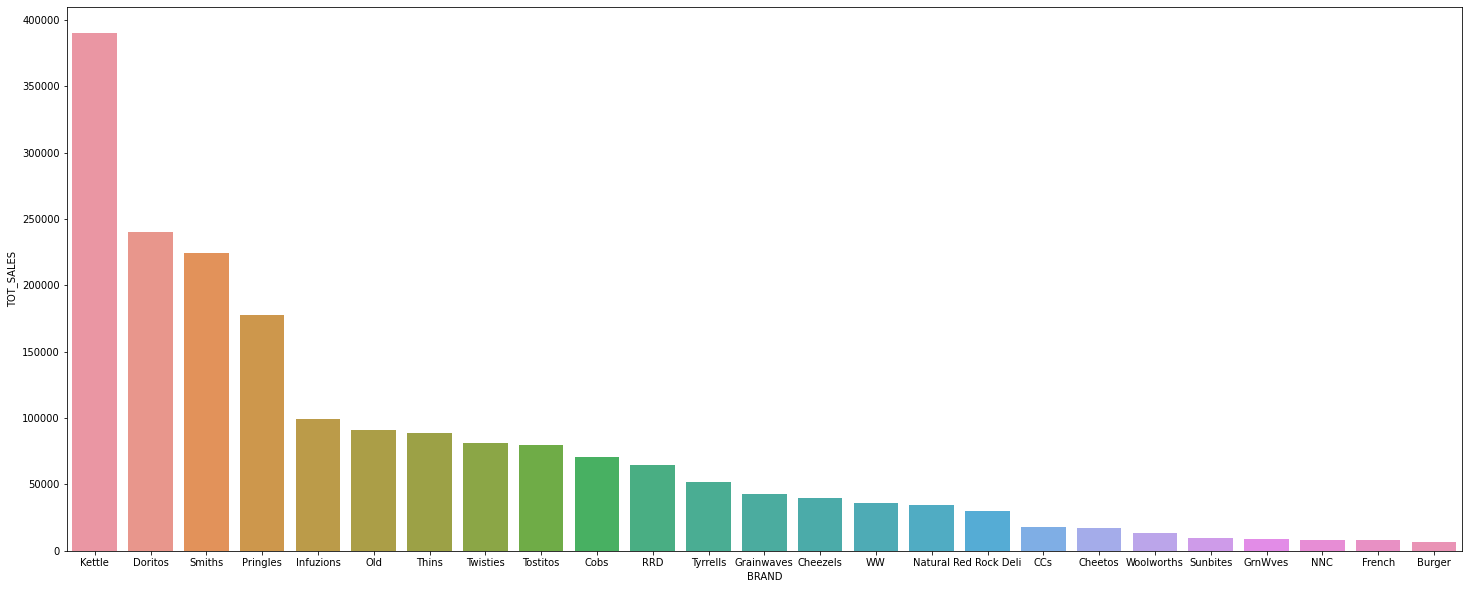

In [ ]:
plt.figure(figsize = (25,10))
sns.barplot(data = brand_most_sales, x = 'BRAND', y = 'TOT_SALES')

# Customer Data


In [ ]:
list(df_behav.columns)

['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']

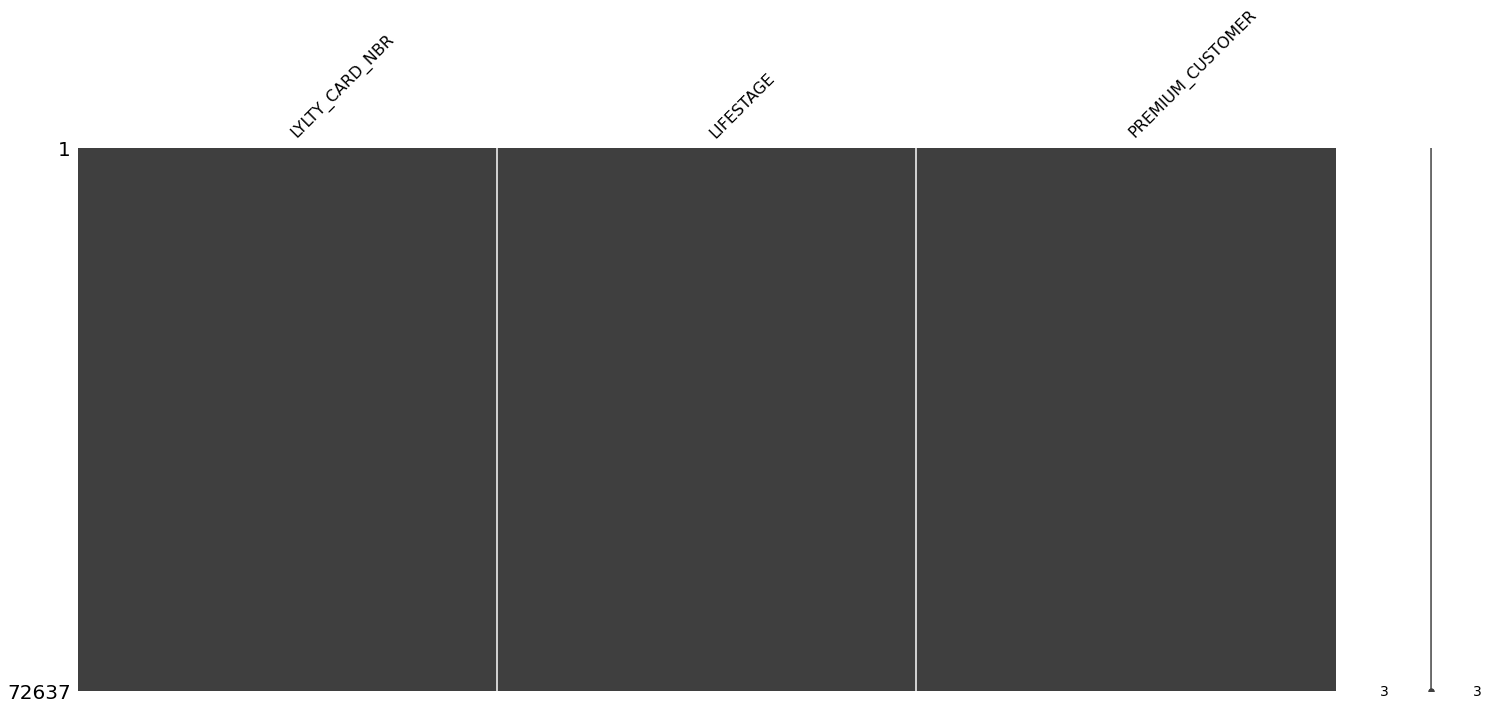

In [ ]:
missingno.matrix(df_behav)

In [ ]:
print(df_behav.shape)
df_behav['LYLTY_CARD_NBR'].nunique()

(72637, 3)


72637

In [ ]:
print(df_behav['LIFESTAGE'].nunique())
df_behav['LIFESTAGE'].unique()

7


array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [ ]:
df_behav['LIFESTAGE'].value_counts(ascending = False).to_frame()

,LIFESTAGE
RETIREES,14805
OLDER SINGLES/COUPLES,14609
YOUNG SINGLES/COUPLES,14441
OLDER FAMILIES,9780
YOUNG FAMILIES,9178
MIDAGE SINGLES/COUPLES,7275
NEW FAMILIES,2549


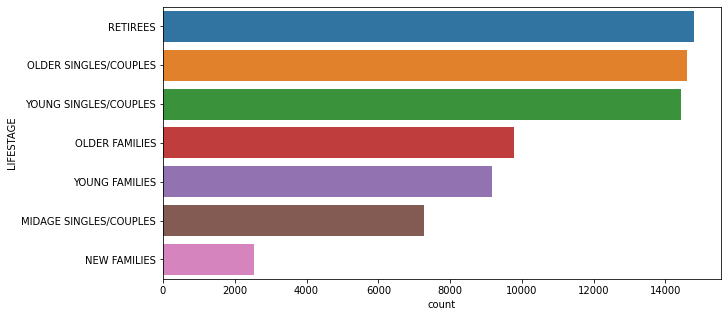

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y= df_behav['LIFESTAGE'], order =df_behav['LIFESTAGE'].value_counts().index)

In [ ]:
print(df_behav['PREMIUM_CUSTOMER'].nunique())
df_behav['PREMIUM_CUSTOMER'].unique()

3


array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [ ]:
df_behav['PREMIUM_CUSTOMER'].value_counts(ascending = False).to_frame()

,PREMIUM_CUSTOMER
Mainstream,29245
Budget,24470
Premium,18922


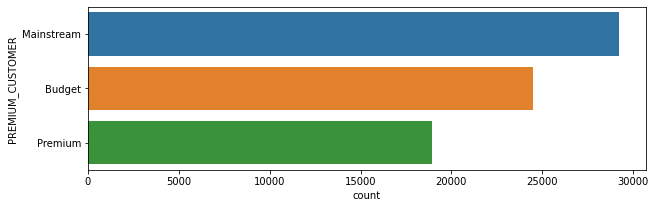

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(y = df_behav['PREMIUM_CUSTOMER'], order= df_behav['PREMIUM_CUSTOMER'].value_counts(ascending = False).index)

# Merge transaction Data and customer Data together


In [ ]:
df_behav['LYLTY_CARD_NBR'] = df_behav['LYLTY_CARD_NBR'].astype(float)
data = pd.merge(df_trans, df_behav)
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1.0,1307.0,346.0,96.0,WW Original Stacked Chips 160g,2.0,3.8,160.0,WW,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1.0,1307.0,347.0,54.0,CCs Original 175g,1.0,2.1,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
data.isnull().sum().to_frame()

,0
DATE,0
STORE_NBR,0
LYLTY_CARD_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0
PROD_SIZE,0
BRAND,0


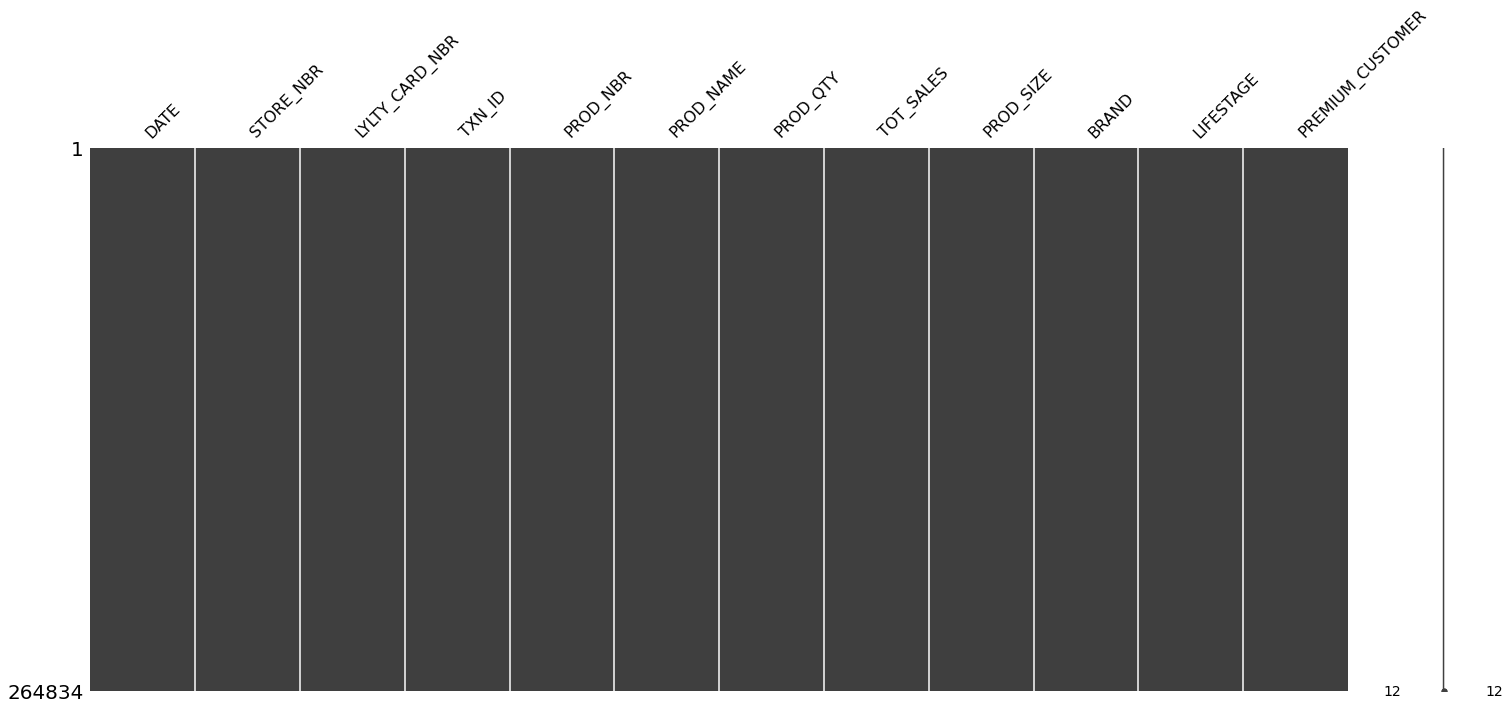

In [ ]:
missingno.matrix(data)

# Data analysis on customer segments
Now that our data is ready for analysis, we can define some metrics of interest to the client:

Who spends the most on chips, describing customers by lifestage and how premium their general purchasing behaviour is
How many customers are in each segment
How many chips are bought per customer by segment
What is the average chip price by customer segment

In [ ]:
sale = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().to_frame()
sale.rename(columns= {'TOT_SALES':'tot_sales'}, inplace = True)
sale.sort_values('tot_sales', inplace= False)

tot_sales
LIFESTAGE              PREMIUM_CUSTOMER           
NEW FAMILIES           Premium            11491.10
                       Mainstream         17013.90
                       Budget             21928.45
MIDAGE SINGLES/COUPLES Budget             35514.80
YOUNG SINGLES/COUPLES  Premium            41642.10
MIDAGE SINGLES/COUPLES Premium            58432.65
YOUNG SINGLES/COUPLES  Budget             61141.60
OLDER FAMILIES         Premium            80658.40
YOUNG FAMILIES         Premium            84025.50
MIDAGE SINGLES/COUPLES Mainstream         90803.85
YOUNG FAMILIES         Mainstream         92788.75
RETIREES               Premium            97646.05
OLDER FAMILIES         Mainstream        103445.55
RETIREES               Budget            113147.80
OLDER SINGLES/COUPLES  Premium           132263.15
                       Mainstream        133393.80
                       Budget            136769.80
YOUNG FAMILIES         Budget            139345.85
RETIREES               Mainstream        155677.05
YOUNG SINGLES/COUPLES  Mainstream        157621.60
OLDER FAMILIES         Budget            168363.25

Text(0, 0.5, 'Total Sales')

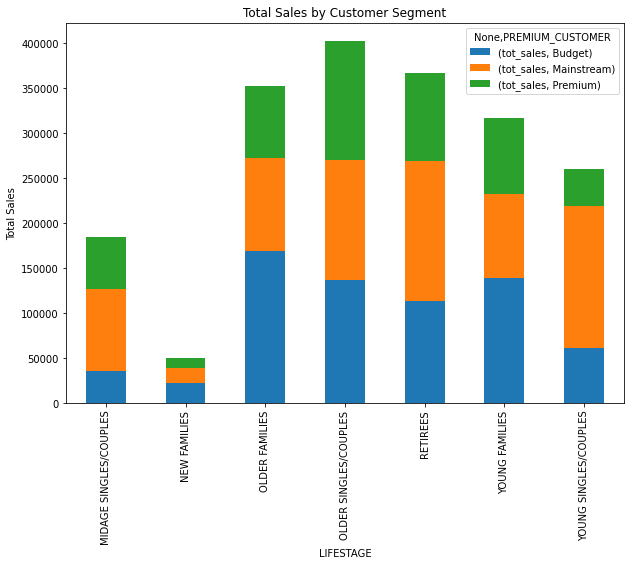

In [ ]:
sale.unstack().plot(kind = 'bar', figsize = (10,7), stacked = True,title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')

Top 3 sales come from budget older families, mainstream young singles/couples and mainstream retirees.



In [ ]:
customers = pd.DataFrame(data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique())
customers.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)
customers.sort_values(by = 'Number of Customers', ascending = False).head(10)

Number of Customers
LIFESTAGE             PREMIUM_CUSTOMER                     
YOUNG SINGLES/COUPLES Mainstream                       8088
RETIREES              Mainstream                       6479
OLDER SINGLES/COUPLES Mainstream                       4930
                      Budget                           4929
                      Premium                          4750
OLDER FAMILIES        Budget                           4675
RETIREES              Budget                           4454
YOUNG FAMILIES        Budget                           4017
RETIREES              Premium                          3872
YOUNG SINGLES/COUPLES Budget                           3779

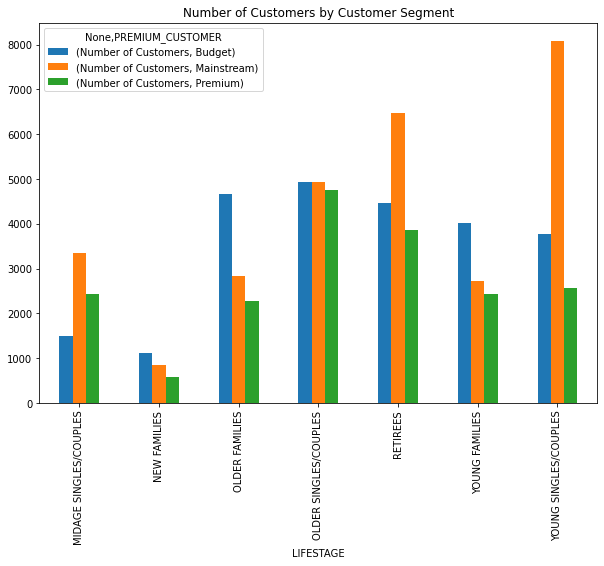

In [ ]:
customers.unstack().plot(kind = 'bar', figsize = (10,7), 
                         title = 'Number of Customers by Customer Segment')

In [ ]:
# Average units per customer by PREMIUM_CUSTOMER and LIFESTAGE

avg_units = data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['LYLTY_CARD_NBR'].nunique()
avg_units = pd.DataFrame(avg_units, columns = {'Average Unit per Customer'})
avg_units.sort_values(by = 'Average Unit per Customer', ascending = False).head()

,,Average Unit per Customer
PREMIUM_CUSTOMER,LIFESTAGE,
Mainstream,OLDER FAMILIES,9.804309
Budget,OLDER FAMILIES,9.639572
Premium,OLDER FAMILIES,9.578091
Budget,YOUNG FAMILIES,9.238486
Premium,YOUNG FAMILIES,9.209207


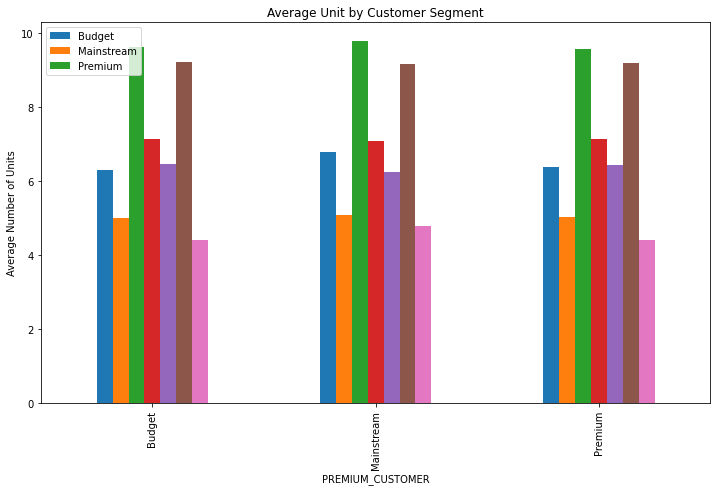

In [ ]:
avg_units.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Number of Units')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)

Older families and young families buy more chips per customer.



In [ ]:
# Average price per unit by PREMIUM_CUSTOMER and LIFESTAGE
avg_price = data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum() /data.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum()
avg_price = pd.DataFrame(avg_price, columns = {'Price per Unit'})
avg_price.sort_values(by = 'Price per Unit', ascending = False).head()

Price per Unit
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES         4.080079
                 MIDAGE SINGLES/COUPLES        4.000346
                 NEW FAMILIES                  3.939315
Budget           NEW FAMILIES                  3.936178
                 RETIREES                      3.933660

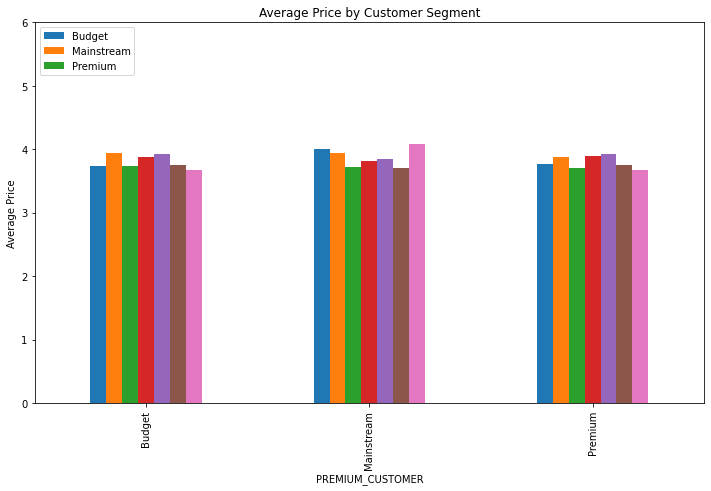

In [ ]:
avg_price.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Price by Customer Segment', ylim = (0, 6))
plt.ylabel('Average Price')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)


Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they do buy chips, it is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

#creat price unit to make anlysis to undersatnd more about which life stage is most buy in minstream 


In [ ]:
pricePerUnit = data
pricePerUnit['unit price'] = price_unit['TOT_SALES']/pricePerUnit['PROD_QTY']
pricePerUnit.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,unit price
0,2018-10-17,1.0,1000.0,1.0,5.0,Natural Chip Compny SeaSalt175g,2.0,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1.0,1307.0,348.0,66.0,CCs Nacho Cheese 175g,3.0,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2018-11-10,1.0,1307.0,346.0,96.0,WW Original Stacked Chips 160g,2.0,3.8,160.0,WW,MIDAGE SINGLES/COUPLES,Budget,1.90
3,2019-03-09,1.0,1307.0,347.0,54.0,CCs Original 175g,1.0,2.1,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
4,2019-05-20,1.0,1343.0,383.0,61.0,Smiths Crinkle Cut Chips Chicken 170g,2.0,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45


In [ ]:
 #Let's group our data into mainstream and non-mainstream

mainstream=pricePerUnit.loc[(pricePerUnit['PREMIUM_CUSTOMER']=='Mainstream')&( (pricePerUnit['LIFESTAGE']=='YOUNG SINGLES/COUPLES')|(pricePerUnit['LIFESTAGE']=='MIDAGE SINGLES/COUPLES') ),'unit price']

nonMainstream=pricePerUnit.loc[(pricePerUnit['PREMIUM_CUSTOMER']!='Mainstream')&( (pricePerUnit['LIFESTAGE']=='YOUNG SINGLES/COUPLES')|(pricePerUnit['LIFESTAGE']=='MIDAGE SINGLES/COUPLES') ),'unit price']

In [ ]:
mainstream.head()

5021    4.4
5022    5.4
5023    3.7
5024    4.4
5025    4.6
Name: unit price, dtype: float64

Text(0.5, 0, 'Price per Unit')

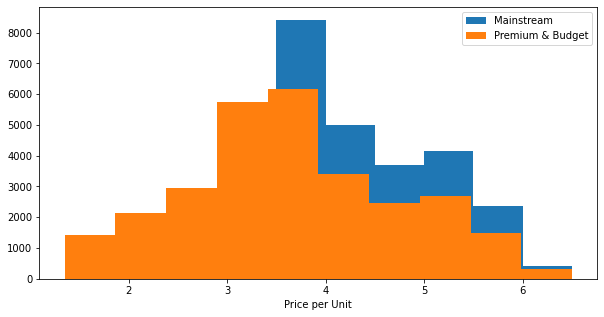

In [ ]:
# Compare histograms of mainstream and non-mainstream customers

plt.figure(figsize = (10, 5))
plt.hist(mainstream, label = 'Mainstream')
plt.hist(nonMainstream, label = 'Premium & Budget')
plt.legend()
plt.xlabel('Price per Unit')

In [ ]:

print("Mainstream average price per unit: ${:.2f}".format(np.mean(mainstream)))
print("Non-mainstream average price per unit: ${:.2f}".format(np.mean(nonMainstream)))
if np.mean(mainstream) > np.mean(nonMainstream):
    print("Mainstream customers have higher average price per unit. ")
else:
    print("Non-mainstream customers have a higher average price per unit. ")

Mainstream average price per unit: $4.05
Non-mainstream average price per unit: $3.69
Mainstream customers have higher average price per unit. 


Mainstream customers have higher average price per unit than that of non-mainstream customers.



we might want to target customers segments that contribute the most to sales to retain them to further increase sales. Let's examine mainstream young singles/couples against the rest of the cutomer segments to see if they prefer any particular brand of chips.

In [ ]:
target = data.loc[(data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
nonTarget = data.loc[(data['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES' ) & (data['PREMIUM_CUSTOMER'] != 'Mainstream'), :]
target.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,unit price
237700,2018-08-16,1.0,1020.0,26.0,19.0,Smiths Crinkle Cut SnagSauce 150g,1.0,2.6,150.0,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
237701,2018-10-02,1.0,1020.0,27.0,7.0,Smiths Crinkle Original 330g,1.0,5.7,330.0,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.7
237702,2019-05-02,1.0,1020.0,28.0,84.0,GrnWves Plus Btroot Chilli Jam 180g,1.0,3.1,180.0,GrnWves,YOUNG SINGLES/COUPLES,Mainstream,3.1
237703,2018-08-17,1.0,1163.0,188.0,46.0,Kettle Original 175g,1.0,5.4,175.0,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
237704,2019-02-07,1.0,1163.0,189.0,12.0,Natural Chip Co Tmato HrbSpce 175g,1.0,3.0,175.0,Natural,YOUNG SINGLES/COUPLES,Mainstream,3.0


# Affinity to brand

In [ ]:
# Target Segment
targetBrand = target.loc[:, ['BRAND', 'PROD_QTY']]
targetSum = targetBrand['PROD_QTY'].sum()
targetBrand['Target Brand Affinity'] = targetBrand['PROD_QTY'] / targetSum
targetBrand = pd.DataFrame(targetBrand.groupby('BRAND')['Target Brand Affinity'].sum())

# Non-target segment
nonTargetBrand = nonTarget.loc[:, ['BRAND', 'PROD_QTY']]
nonTargetSum = nonTargetBrand['PROD_QTY'].sum()
nonTargetBrand['Non-Target Brand Affinity'] = nonTargetBrand['PROD_QTY'] / nonTargetSum
nonTargetBrand = pd.DataFrame(nonTargetBrand.groupby('BRAND')['Non-Target Brand Affinity'].sum())

In [ ]:
targetBrand.head()


,Target Brand Affinity
BRAND,
Burger,0.002744
CCs,0.010484
Cheetos,0.007533
Cheezels,0.016851
Cobs,0.041856


In [ ]:
# Merge the two dataframes together

brand_proportions = pd.merge(targetBrand, nonTargetBrand, left_index = True, right_index = True)
brand_proportions.head()


,Target Brand Affinity,Non-Target Brand Affinity
BRAND,,
Burger,0.002744,0.006094
CCs,0.010484,0.017191
Cheetos,0.007533,0.010960
Cheezels,0.016851,0.017619
Cobs,0.041856,0.035836


In [ ]:
brand_proportions['Affinity to Brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['Non-Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Brand', ascending = False)

,Target Brand Affinity,Non-Target Brand Affinity,Affinity to Brand
BRAND,,,
Tyrrells,0.029587,0.023968,1.234454
Twisties,0.043306,0.035355,1.224877
Kettle,0.185649,0.155243,1.195863
Tostitos,0.042581,0.035744,1.191269
Old,0.041598,0.034931,1.190850
Pringles,0.111980,0.094240,1.188241
Grainwaves,0.027309,0.023200,1.177104
Cobs,0.041856,0.035836,1.167987
Doritos,0.122877,0.105278,1.167174


# Affinity to pack size

In [ ]:
# Target segment 
targetSize = target.loc[:,['PROD_SIZE','PROD_QTY']]
targetSum = targetSize['PROD_QTY'].sum()
targetSize['Target Pack Affinity'] = targetSize['PROD_QTY'] / targetSum
targetSize = pd.DataFrame(targetSize.groupby('PROD_SIZE')['Target Pack Affinity'].sum())

# Non-target segment
nonTargetSize = nonTarget.loc[:, ['PROD_SIZE', 'PROD_QTY']]
nonTargetSum = nonTargetSize['PROD_QTY'].sum()
nonTargetSize['Non-Target Pack Affinity'] = nonTargetSize['PROD_QTY'] / nonTargetSum
nonTargetSize = pd.DataFrame(nonTargetSize.groupby('PROD_SIZE')['Non-Target Pack Affinity'].sum())

In [ ]:
# Merge the two dataframes together

pack_proportions = pd.merge(targetSize, nonTargetSize, left_index = True, right_index = True)
pack_proportions.head()

,Target Pack Affinity,Non-Target Pack Affinity
PROD_SIZE,,
70.0,0.002847,0.005857
90.0,0.005954,0.011756
110.0,0.099658,0.083489
125.0,0.002821,0.005570
134.0,0.111980,0.094240


In [ ]:
pack_proportions['Affinity to Pack'] = pack_proportions['Target Pack Affinity'] / pack_proportions['Non-Target Pack Affinity']
pack_proportions.sort_values(by = 'Affinity to Pack', ascending = False)

,Target Pack Affinity,Non-Target Pack Affinity,Affinity to Pack
PROD_SIZE,,,
270.0,0.029846,0.023366,1.277295
380.0,0.030156,0.023964,1.258400
330.0,0.057465,0.047511,1.209522
110.0,0.099658,0.083489,1.193675
134.0,0.111980,0.094240,1.188241
210.0,0.027309,0.023200,1.177104
135.0,0.013849,0.012053,1.149001
250.0,0.013460,0.011989,1.122716
170.0,0.075740,0.074888,1.011386


It looks like mainstream singles/couples are more likely to purchase a 270g pack size compared to other pack sizes.

In [ ]:
# Which brand offers 270g pack size?

data.loc[data['PROD_SIZE'] == 270, :].head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,unit price
40,2019-05-18,9.0,9208.0,8634.0,15.0,Twisties Cheese 270g,2.0,9.2,270.0,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
96,2018-08-24,39.0,39167.0,35639.0,113.0,Twisties Chicken270g,2.0,9.2,270.0,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
148,2019-05-06,54.0,54305.0,48304.0,15.0,Twisties Cheese 270g,2.0,9.2,270.0,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
155,2019-05-20,55.0,55073.0,48887.0,113.0,Twisties Chicken270g,1.0,4.6,270.0,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
245,2019-01-01,80.0,80182.0,78980.0,15.0,Twisties Cheese 270g,2.0,9.2,270.0,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
293,2018-11-18,84.0,84096.0,83672.0,113.0,Twisties Chicken270g,2.0,9.2,270.0,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
294,2019-05-20,88.0,88320.0,87811.0,113.0,Twisties Chicken270g,2.0,9.2,270.0,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
339,2018-07-11,102.0,102115.0,102207.0,15.0,Twisties Cheese 270g,2.0,9.2,270.0,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
412,2019-04-05,118.0,118007.0,120735.0,113.0,Twisties Chicken270g,2.0,9.2,270.0,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6
415,2018-07-01,119.0,119051.0,122360.0,113.0,Twisties Chicken270g,2.0,9.2,270.0,Twisties,MIDAGE SINGLES/COUPLES,Budget,4.6


In [ ]:
# Is Twisties the only brand who sells 270g pack size?

data.loc[data['PROD_SIZE'] == 270, 'BRAND'].unique()

array(['Twisties'], dtype=object)

Twisties is the only brand that offers 270g pack size.

# Conclusion
**bold text**Sales are highest for (Budget, OLDER FAMILIES), (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES)
We found that (Mainstream, YOUNG SINGLES/COUPLES) and (Mainstream, RETIREES) are mainly due to the fact that there are more customers in these segments
(Mainstream, YOUNG SINGLES/COUPLES) are more likely to pay more per packet of chips than their premium and budget counterparts
They are also more likely to purchase 'Tyrrells' and '270g' pack sizes than the rest of the population